## Gridrec

This example is based on the Gridrec example provided by [TomoPy](http://tomopy.readthedocs.io/en/latest/).

[user manual](https://media.readthedocs.org/pdf/tomopy/latest/tomopy.pdf)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tomopy
import dxchange
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as ipv

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [5]:
# this data contains the angles of each projection
ctdata = np.loadtxt("_data/test_scan_250/_ctdata.txt",skiprows=3)
theta = np.deg2rad(ctdata[:,1])

In [6]:
fname = '_data/test_scan_250/test scan 250_0001.tif'

In [7]:
indices = [i for i in range(1,752)]
data = dxchange.read_tiff_stack(fname, indices)
shape(data)

(751, 1530, 1916)

(751, 765, 958)


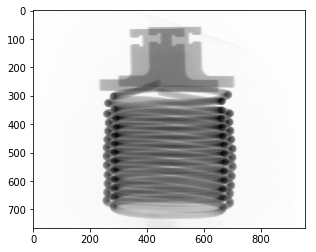

In [8]:
# downsample and minus log
proj = tomopy.minus_log(data[::1,::4,::4])
print(shape(proj))

# plot the radiograph
plt.imshow(proj[180, :, :], cmap='Greys')
plt.show()

In [9]:
# calculate center of rotation
# find_center_vo seems to work better than the default find_center but I'm not confident either is better than just the mid-point
# rot_center = tomopy.find_center(proj, theta, tol=0.5)
# rot_center = tomopy.find_center_vo(proj)
rot_center = proj.shape[2]/2
print("guess: ", proj.shape[2]/2)
print("actual: ", rot_center)

guess:  479.0
actual:  479.0


In [10]:
# gridrec
rec = tomopy.recon(proj,theta,sinogram_order=False,
                   center=rot_center,algorithm='gridrec')

# LPrec (not working)
# rec = tomopy.recon(proj, theta, center=rot_center, 
#                    algorithm=tomopy.lprec, lpmethod='lpfbp', 
#                    filter_name='parzen')

# ASTRA (not working)
# options = {'proj_type':'linear', 'method':'FBP'}
# rec = tomopy.recon(proj, theta, center=rot_center, 
#                      algorithm=tomopy.astra, options=options)

# mask result
rec = tomopy.circ_mask(rec, axis=0, ratio=0.75)

In [11]:
# plot volume
ipv.figure()
vol = ipv.volshow(rec)
ipv.show()

/anaconda3/lib/python3.6/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/anaconda3/lib/python3.6/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/anaconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


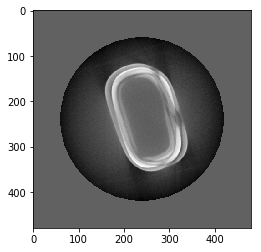

In [19]:
# plot slices
plt.imshow(rec[200, :, :], cmap='Greys_r')
plt.show()

In [27]:
save('_output/reconstruction_data',rec)